<h1>Importing necessary Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h1>Dengue Analysis</h1>
<h2>Analyst: King Jannhel Driz</h2>

<h1>Load the Dataset</h1>

In [2]:
dengue = pd.read_csv('dengue.csv')

<h1>Define month order for categorical sorting</h1>

In [25]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

dengue.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Death_Rate
0,January,2016,Region I,705,1,0.001418
1,February,2016,Region I,374,0,0.000000
2,March,2016,Region I,276,0,0.000000
3,April,2016,Region I,240,2,0.008333
4,May,2016,Region I,243,1,0.004115


<h1>Convert relevant columns to categorical</h1>

In [4]:
dengue['Region'] = dengue['Region'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue['Month'] = dengue['Month'].astype('category')

<h1>Insight 1: Total Dengue Cases per Year</h1>
<h3>This insight shows the total number of dengue cases reported annually, highlighting trends such as spikes during epidemic years (e.g., 2019). It helps identify whether dengue cases are increasing or decreasing over time.</h3>

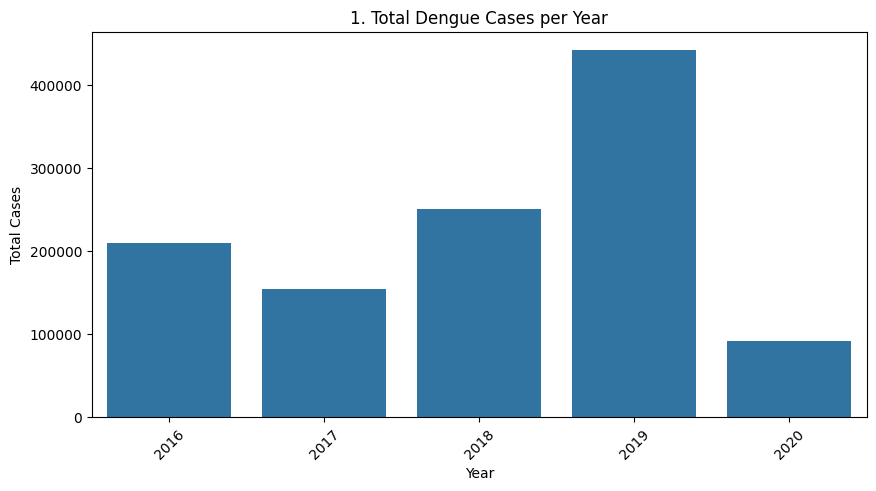

In [5]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dengue.groupby('Year')['Dengue_Cases'].sum().reset_index(), x='Year', y='Dengue_Cases')
plt.title("1. Total Dengue Cases per Year")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 2: Total Dengue Deaths per Year</h1>
<h3>This visualization summarizes the total dengue-related deaths each year, emphasizing years with higher fatality rates. It provides a clear view of how deadly dengue outbreaks have been over time.</h3>

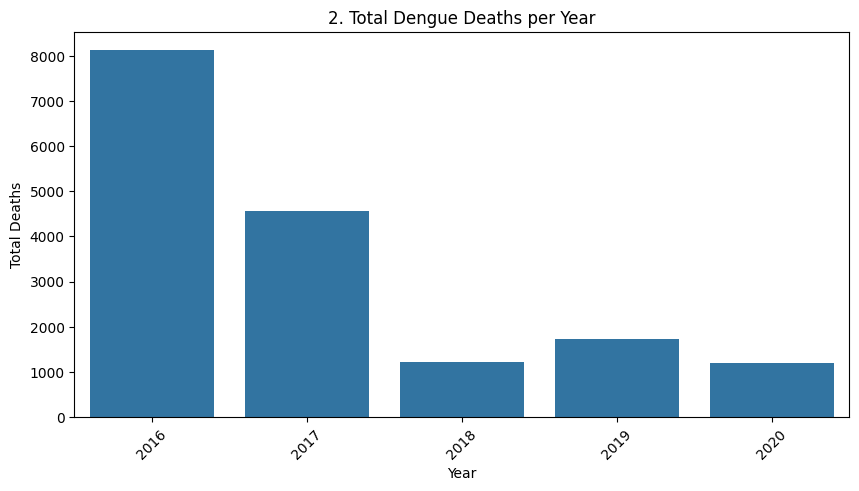

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index(), x='Year', y='Dengue_Deaths')
plt.title("2. Total Dengue Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 3: Average Monthly Dengue Cases (All Years and Regions)</h1>
<h3>The average monthly dengue cases reveal seasonal patterns, with peaks typically occurring during the rainy season (e.g., July–September). This helps identify critical months for dengue prevention efforts.</h3>

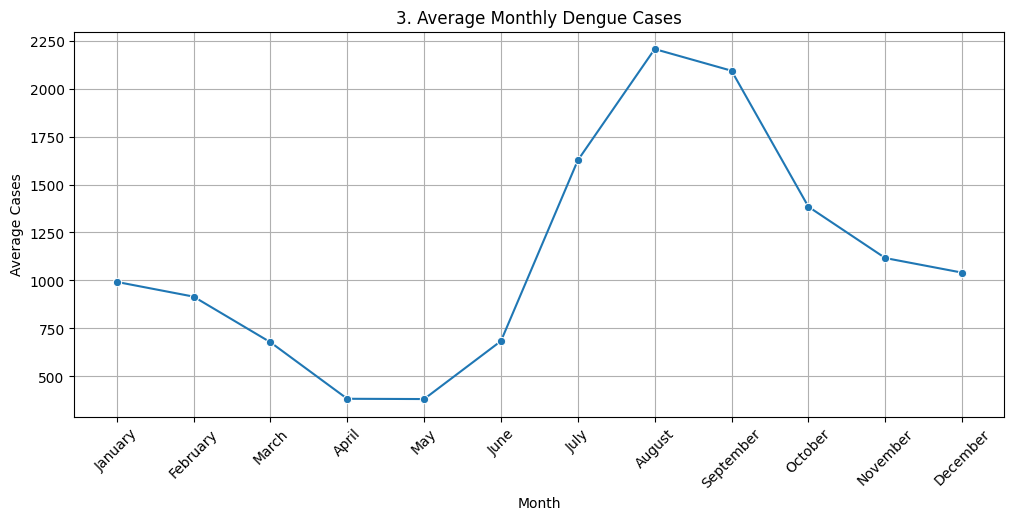

In [7]:
avg_monthly = dengue.groupby('Month')['Dengue_Cases'].mean().reindex(month_order)
plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_monthly, marker='o')
plt.title("3. Average Monthly Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h1>Insight 4: Dengue Cases vs. Dengue Deaths by Region</h1>
<h3>This scatterplot examines the relationship between dengue cases and deaths across regions, showing which regions may have higher fatality risks despite similar case numbers.</h3>

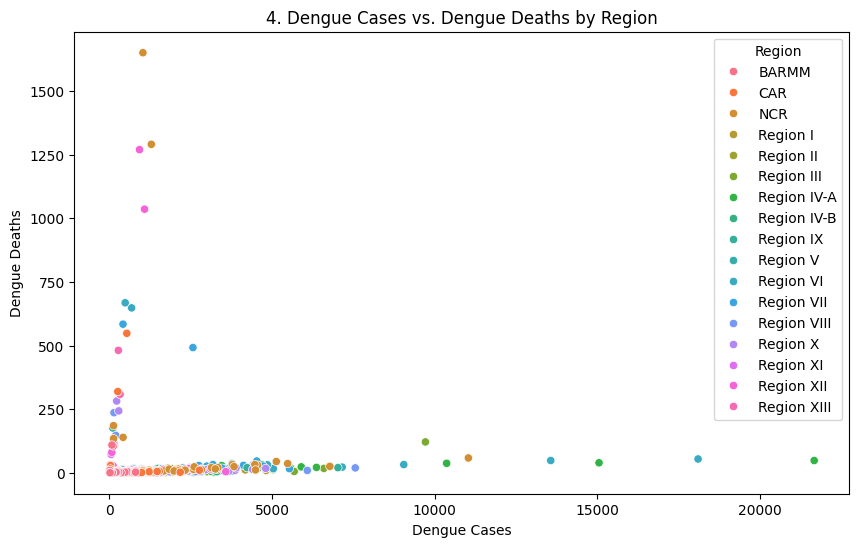

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Region')
plt.title("4. Dengue Cases vs. Dengue Deaths by Region")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight 5: Average Monthly Dengue Deaths</h1>
<h3>The monthly average deaths highlight periods with the highest mortality rates, often coinciding with peak dengue transmission months. This aids in understanding when healthcare systems face the greatest strain.</h3>

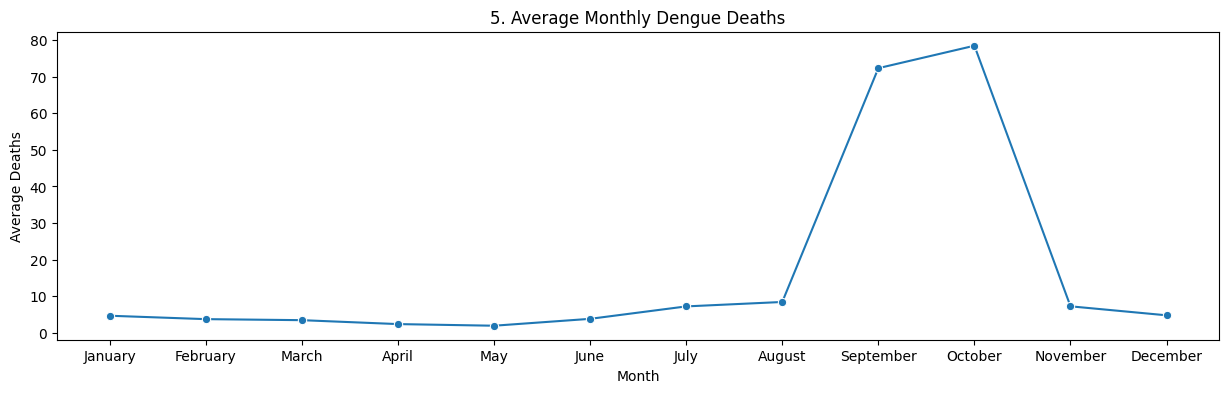

In [9]:
monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)
plt.figure(figsize=(15, 4))
sns.lineplot(data=monthly_deaths, marker='o')
plt.title("5. Average Monthly Dengue Deaths")
plt.xlabel("Month")
plt.ylabel("Average Deaths")
plt.show()

<h1>Insight 6: Year with Highest Dengue Deaths</h1>
<h3>This bar chart identifies the year with the most dengue-related deaths, often corresponding to severe outbreaks or inadequate healthcare responses during that period.</h3>

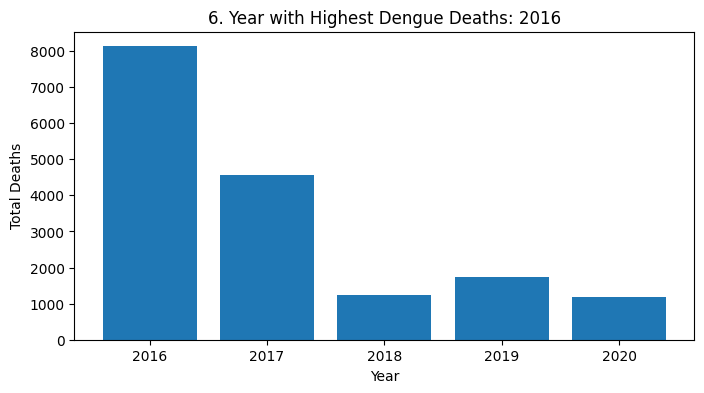

In [10]:
death_by_year = dengue.groupby('Year')['Dengue_Deaths'].sum()
plt.figure(figsize=(8, 4))
plt.bar(death_by_year.index, death_by_year.values)
plt.title(f"6. Year with Highest Dengue Deaths: {death_by_year.idxmax()}")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.show()

<h1>Insight 7: Total Dengue Deaths by Region</h1>
<h3>This bar plot ranks regions by their total dengue deaths, showing which areas suffer the most fatalities. It highlights regions requiring urgent intervention to reduce dengue-related mortality.</h3>

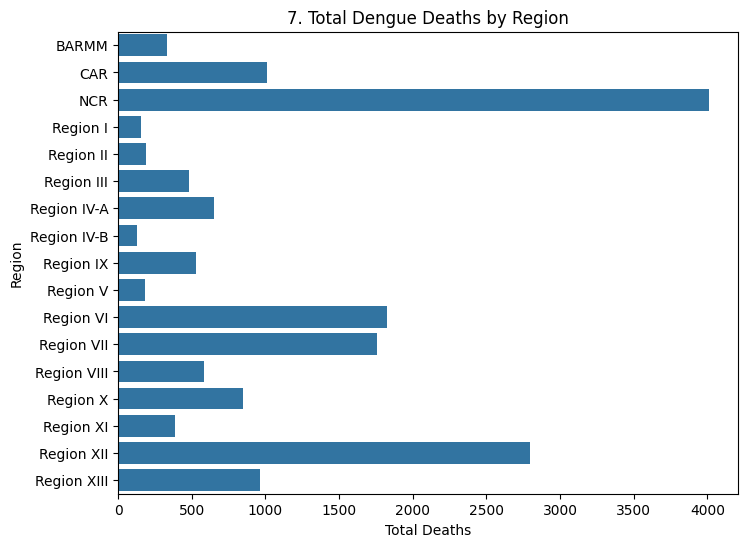

In [11]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=region_deaths.values, y=region_deaths.index)
plt.title("7. Total Dengue Deaths by Region")
plt.xlabel("Total Deaths")
plt.ylabel("Region")
plt.show()

<h1>Insight 8: Dengue Cases Over Time</h1>
<h3>This line chart tracks dengue cases month-by-month across years, revealing long-term trends and seasonal fluctuations. It provides a comprehensive view of how dengue transmission evolves over time.</h3>

<Figure size 1000x600 with 0 Axes>

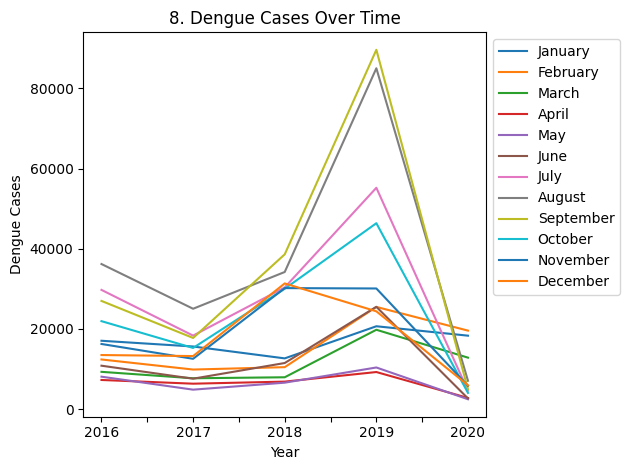

In [12]:
time_series = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().unstack().reindex(columns=month_order)
plt.figure(figsize=(10, 6))
time_series.plot(kind='line')
plt.title("8. Dengue Cases Over Time")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<h1> Insight 9: Heatmap of Average Cases by Region and Month</h1>
<h3>The heatmap visualizes the average dengue cases by region and month, identifying regional hotspots and peak transmission periods. It helps target interventions to specific regions during high-risk months.</h3>

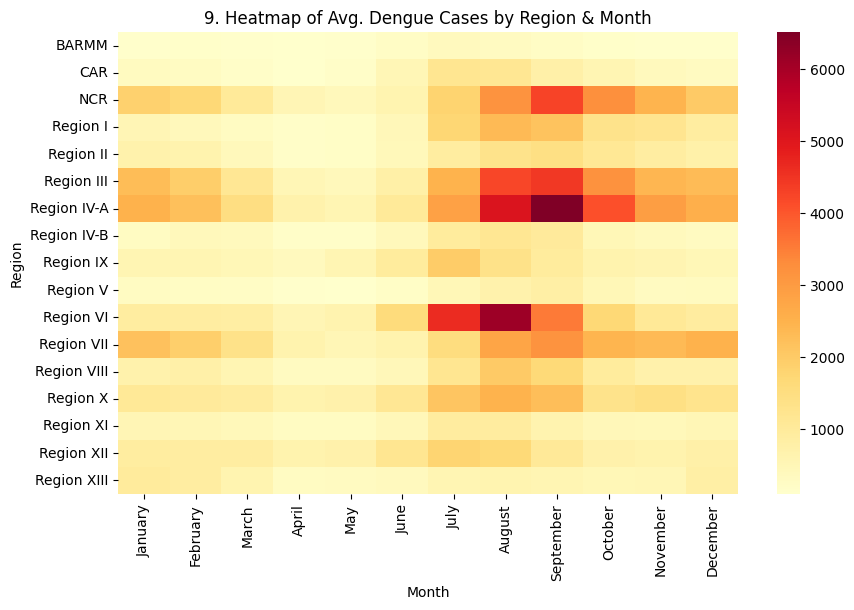

In [13]:
pivot_cases = dengue.pivot_table(index='Region', columns='Month', values='Dengue_Cases', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_cases, cmap='YlOrRd')
plt.title("9. Heatmap of Avg. Dengue Cases by Region & Month")
plt.xlabel("Month")
plt.ylabel("Region")
plt.show()

<h1>Insight 10: Distribution of Dengue Cases per Region</h1>
<h3>This boxplot compares the variability in dengue cases across regions, highlighting regions with consistently high or low case numbers. It identifies outliers and regions with extreme transmission levels.</h3>

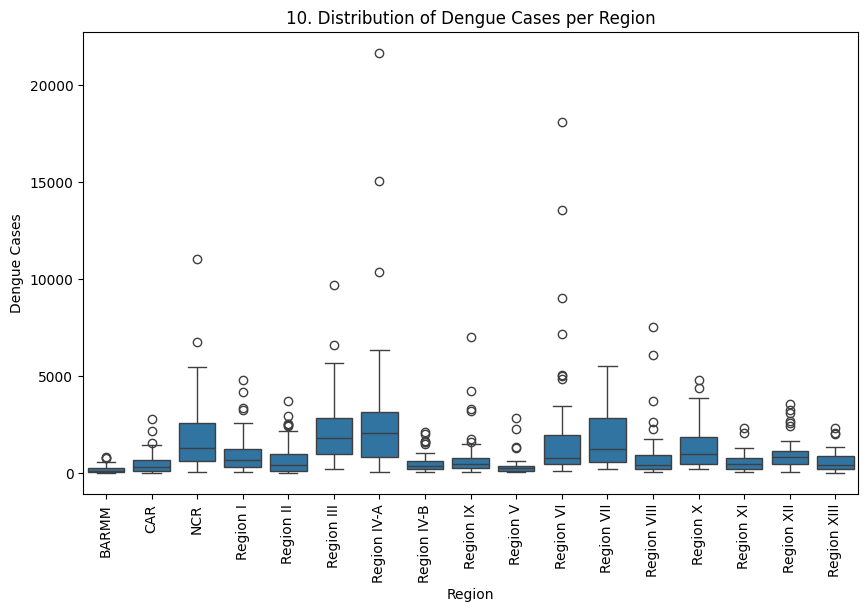

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dengue, x='Region', y='Dengue_Cases')
plt.title("10. Distribution of Dengue Cases per Region")
plt.xlabel("Region")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=90)
plt.show()

<h1>Insight 11: Distribution of Dengue Deaths per Region</h1>
<h3>Similar to Insight 10, this boxplot examines the variability in dengue deaths across regions, emphasizing regions with disproportionately high fatalities. It highlights disparities in healthcare outcomes.</h3>

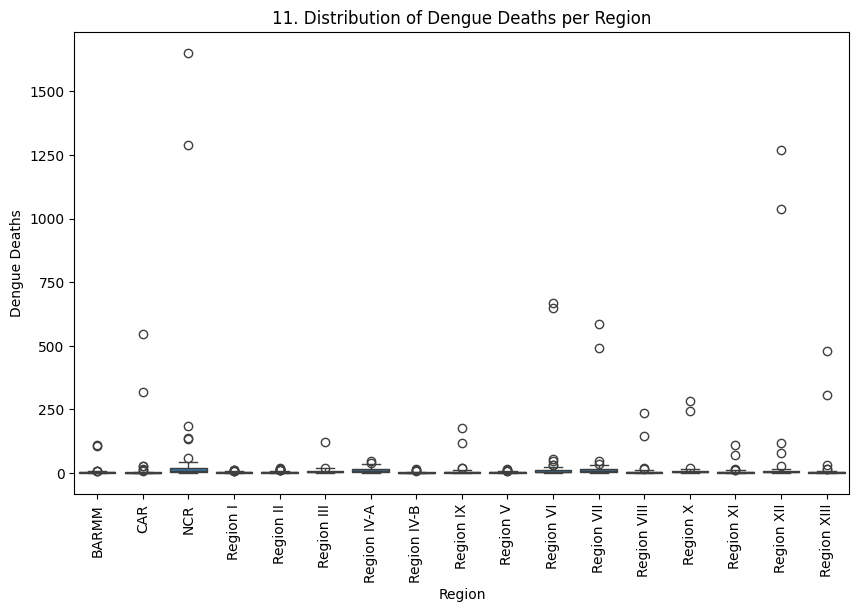

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dengue, x='Region', y='Dengue_Deaths')
plt.title("11. Distribution of Dengue Deaths per Region")
plt.xlabel("Region")
plt.ylabel("Dengue Deaths")
plt.xticks(rotation=90)
plt.show()

<h1>Insight 12: Heatmap of Average Deaths by Region and Month</h1>
<h3>This heatmap identifies months and regions with the highest average death rates, pinpointing critical periods for targeted healthcare interventions.</h3>

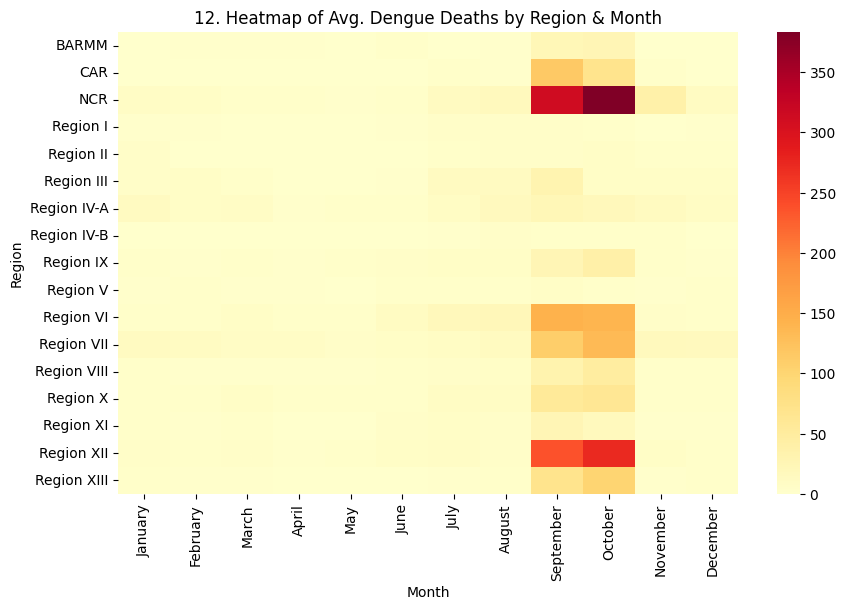

In [16]:
pivot_deaths = dengue.pivot_table(index='Region', columns='Month', values='Dengue_Deaths', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_deaths, cmap='YlOrRd')
plt.title("12. Heatmap of Avg. Dengue Deaths by Region & Month")
plt.xlabel("Month")
plt.ylabel("Region")
plt.show()

<h1>Insight 13: Yearly Dengue Cases in Region I</h1>
<h3>This line chart tracks dengue cases in Region I over the years, showing trends such as spikes during epidemic years and seasonal patterns unique to this region.</h3>

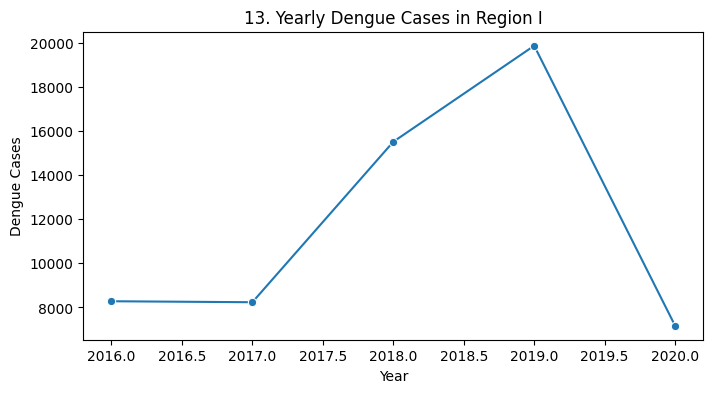

In [17]:
region1 = dengue[dengue['Region'] == 'Region I']
region1_grouped = region1.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(8, 4))
sns.lineplot(data=region1_grouped, marker='o')
plt.title("13. Yearly Dengue Cases in Region I")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.show()

<h1>Insight 14: Death Rate by Region</h1>
<h3>This boxplot compares the death rate (deaths per case) across regions, highlighting regions where dengue cases are more likely to result in fatalities. It underscores disparities in healthcare quality or outbreak severity.</h3>

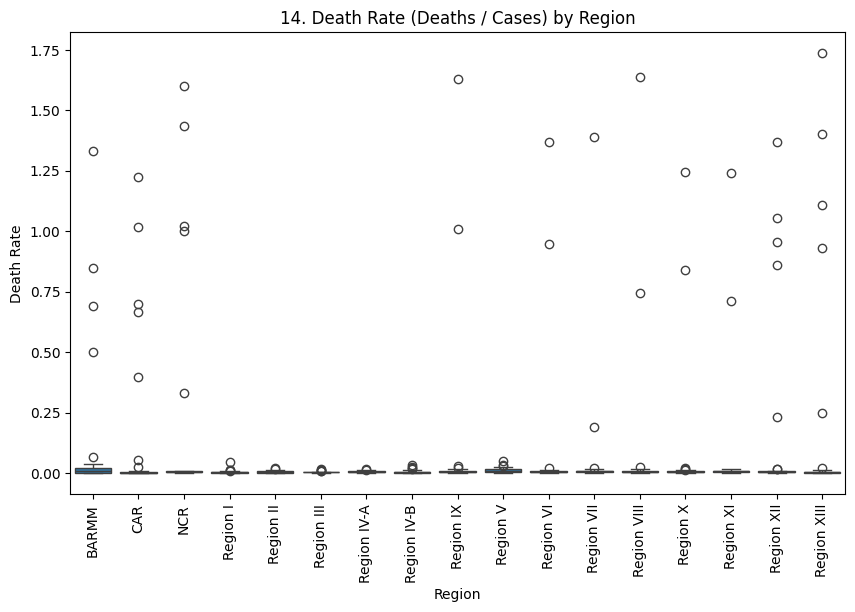

In [18]:
dengue['Death_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
plt.figure(figsize=(10, 6))
sns.boxplot(data=dengue, x='Region', y='Death_Rate')
plt.title("14. Death Rate (Deaths / Cases) by Region")
plt.xlabel("Region")
plt.ylabel("Death Rate")
plt.xticks(rotation=90)
plt.show()

<h1>Insight 15: Average Deaths per Month</h1>
<h3>This bar chart shows the average number of dengue-related deaths per month, emphasizing months with the highest mortality. It helps allocate resources during critical periods.</h3>

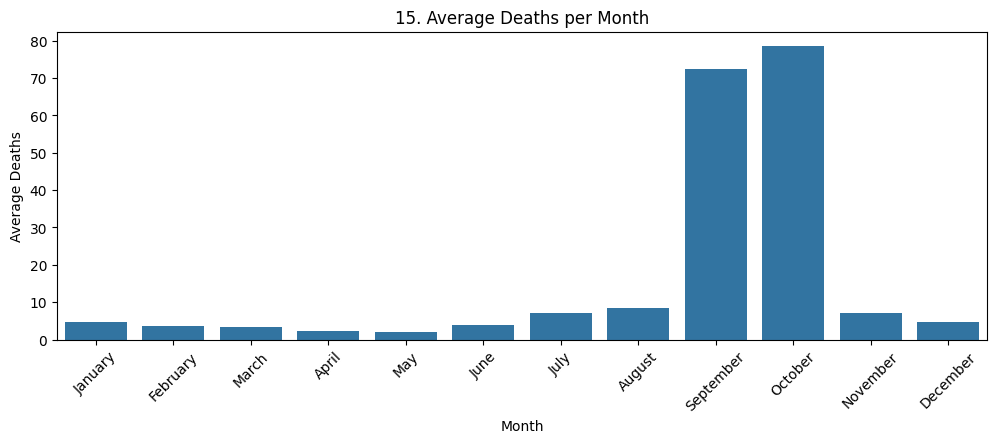

In [19]:
avg_deaths_month = dengue.groupby('Month')['Dengue_Deaths'].mean().reindex(month_order)
plt.figure(figsize=(12, 4))
sns.barplot(x=avg_deaths_month.index, y=avg_deaths_month.values)
plt.title("15. Average Deaths per Month")
plt.xlabel("Month")
plt.ylabel("Average Deaths")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 16: Top 5 Highest Monthly Cases</h1>
<h3>This bar chart ranks the top five months with the highest dengue cases, often coinciding with epidemic outbreaks. It highlights specific periods requiring heightened vigilance.</h3>

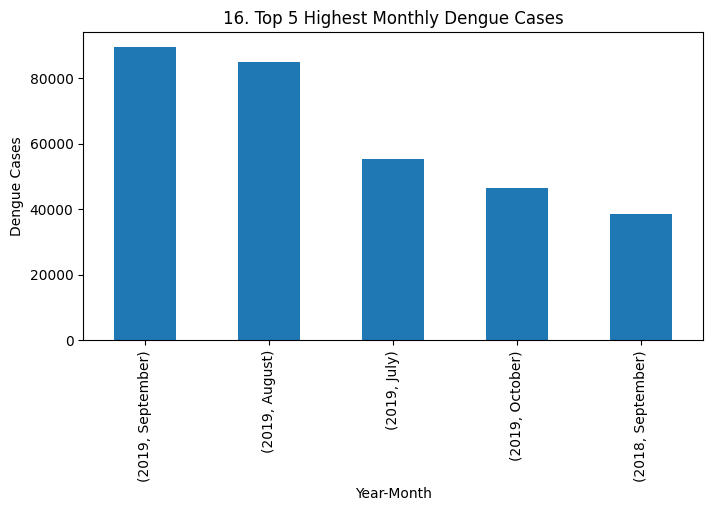

In [20]:
top_months = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 4))
top_months.plot(kind='bar')
plt.title("16. Top 5 Highest Monthly Dengue Cases")
plt.xlabel("Year-Month")
plt.ylabel("Dengue Cases")
plt.show()

<h1>Insight 17: Region I vs Region III - Cases Over Years</h1>
<h3>This line chart compares dengue cases in Region I and Region III over time, showing differences in transmission trends and epidemic severity between the two regions.</h3>

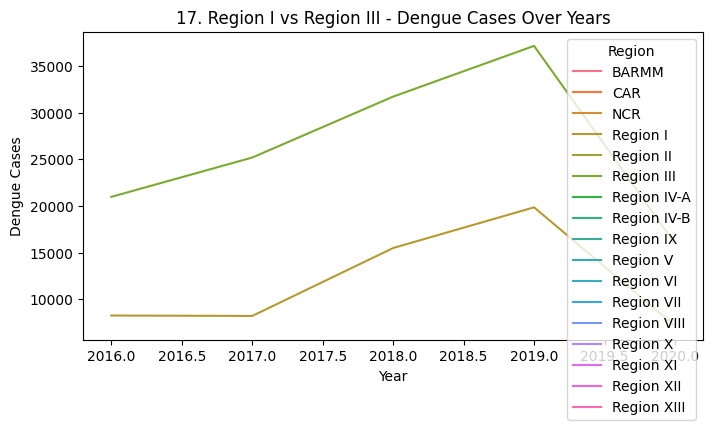

In [21]:
subset = dengue[dengue['Region'].isin(['Region I', 'Region III'])]
plt.figure(figsize=(8, 4))
sns.lineplot(data=subset, x='Year', y='Dengue_Cases', hue='Region', estimator='sum', ci=None)
plt.title("17. Region I vs Region III - Dengue Cases Over Years")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.show()

<h1>Insight 18: Region with Lowest Average Cases</h1>
<h3>This bar plot identifies the region with the lowest average dengue cases, providing insights into factors contributing to lower transmission rates in certain areas.</h3>

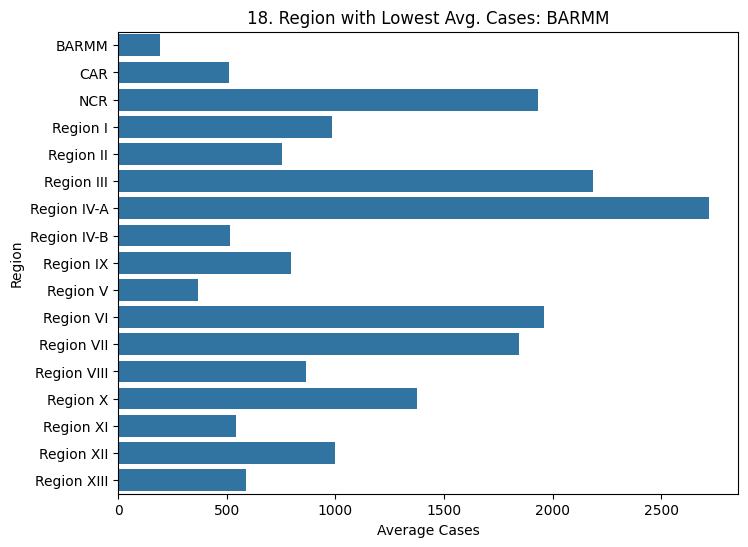

In [22]:
region_avg_cases = dengue.groupby('Region')['Dengue_Cases'].mean()
lowest_region = region_avg_cases.idxmin()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_avg_cases.values, y=region_avg_cases.index)
plt.title(f"18. Region with Lowest Avg. Cases: {lowest_region}")
plt.xlabel("Average Cases")
plt.ylabel("Region")
plt.show()

<h1>Insight 19: Correlation Heatmap</h1>
<h3>The heatmap analyzes correlations between dengue cases, deaths, and death rates, revealing relationships such as higher cases correlating with higher deaths but not necessarily higher death rates.</h3>

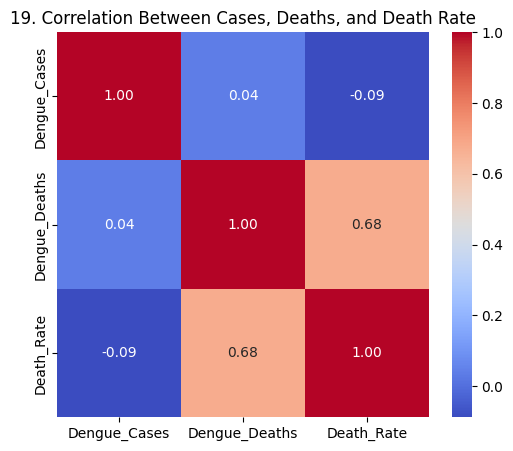

In [23]:
dengue['Death_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
corr = dengue[['Dengue_Cases', 'Dengue_Deaths', 'Death_Rate']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("19. Correlation Between Cases, Deaths, and Death Rate")
plt.show()

<h1>Insight 20: Seasonal Dengue Case Trends by Region</h1>
<h3>This line chart examines how dengue cases vary seasonally across regions, highlighting consistent patterns such as summer peaks. It helps tailor region-specific prevention strategies.</h3>

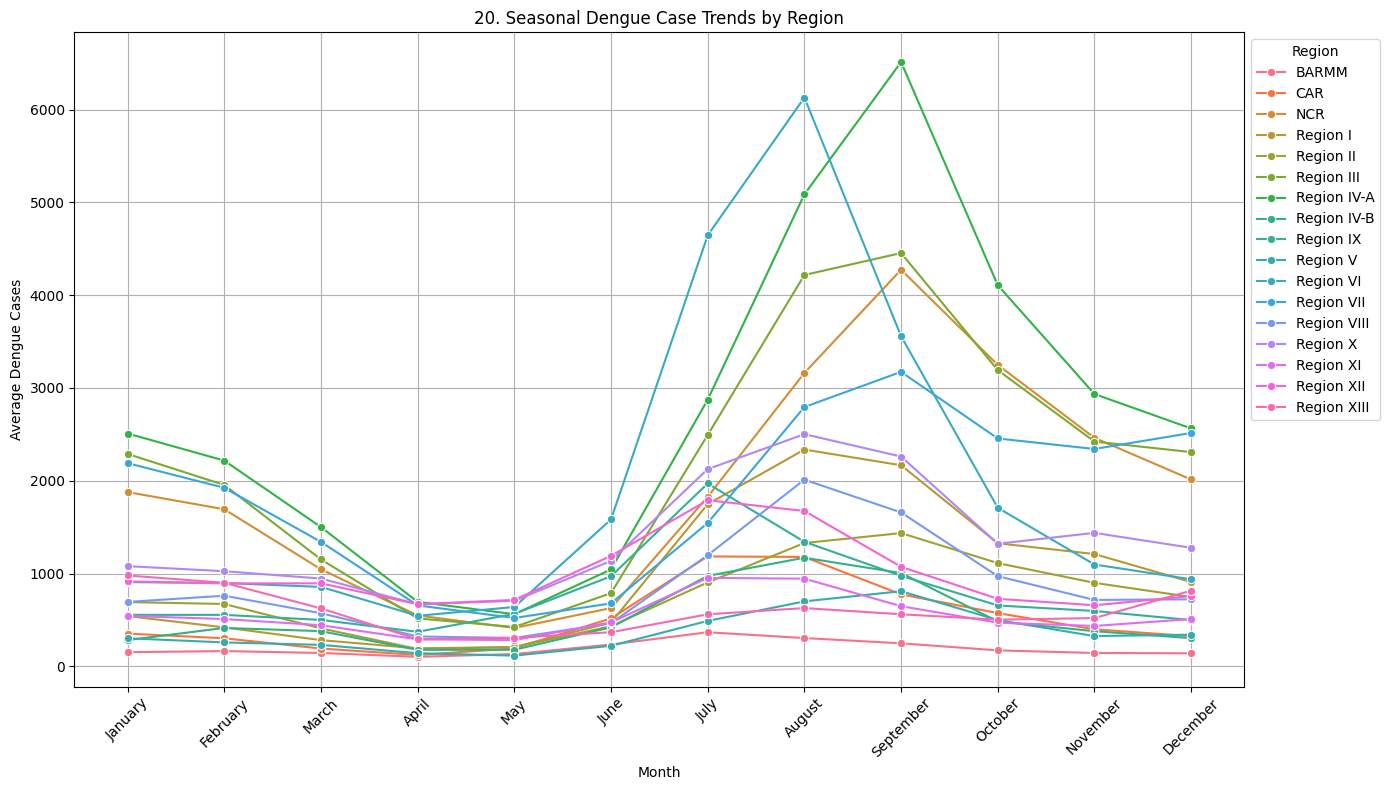

In [24]:
seasonal_trends = dengue.groupby(['Month', 'Region'])['Dengue_Cases'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=seasonal_trends, x='Month', y='Dengue_Cases', hue='Region', marker='o')
plt.title("20. Seasonal Dengue Case Trends by Region")
plt.xlabel("Month")
plt.ylabel("Average Dengue Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Region")
plt.tight_layout()
plt.show()

<h1>Insight 21: Monthly Dengue Case Trends in NCR</h1>
<h3>This heatmap highlights months with the highest dengue cases in NCR, typically during the rainy season (July–September). It helps identify periods requiring heightened public health measures in urban areas.</h3>

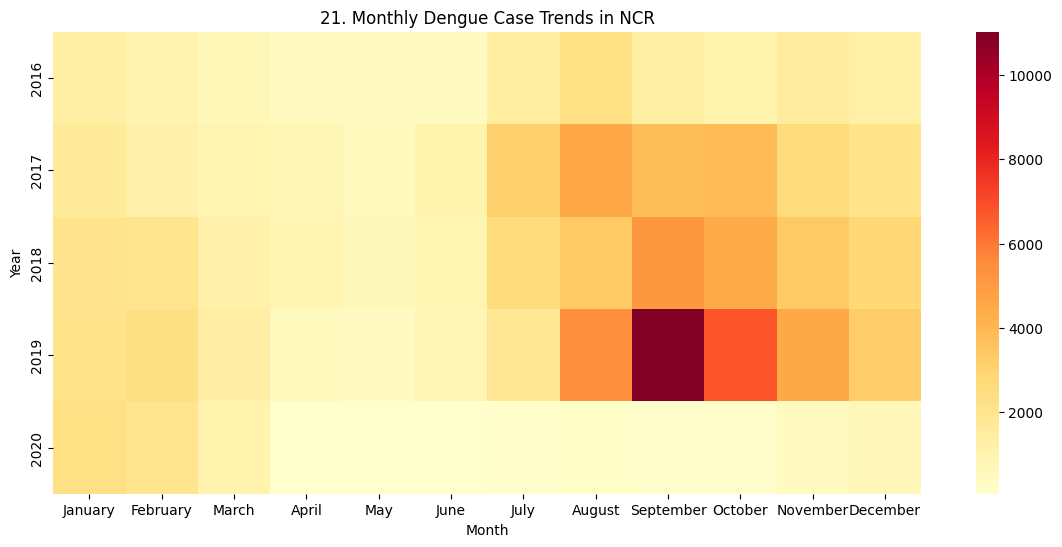

In [26]:
ncr_data = dengue[dengue['Region'] == 'NCR']
monthly_ncr = ncr_data.groupby(['Year', 'Month'])['Dengue_Cases'].sum().unstack().reindex(columns=month_order)

plt.figure(figsize=(14, 6))
sns.heatmap(monthly_ncr, cmap='YlOrRd')
plt.title("21. Monthly Dengue Case Trends in NCR")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

<h1>Insight 22: Top 5 Regions with Highest Average Death Rates</h1>
<h3>Regions with high death rates may lack adequate healthcare infrastructure or face delays in treatment. This insight highlights areas needing targeted interventions to reduce mortality.</h3>

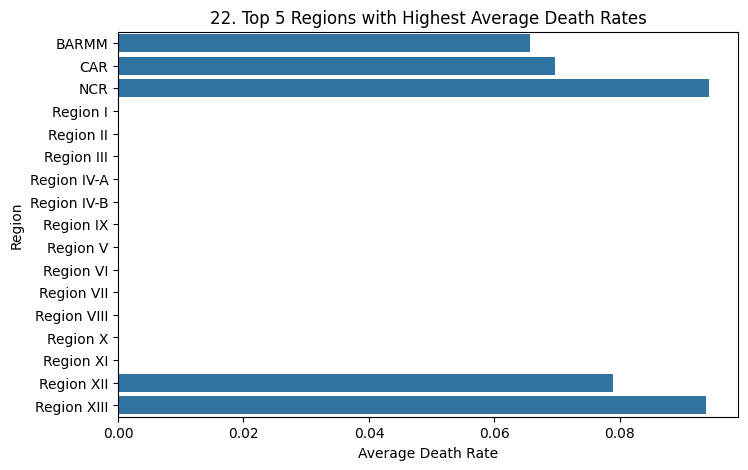

In [27]:
dengue['Death_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
avg_death_rate = dengue.groupby('Region')['Death_Rate'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_death_rate.values, y=avg_death_rate.index)
plt.title("22. Top 5 Regions with Highest Average Death Rates")
plt.xlabel("Average Death Rate")
plt.ylabel("Region")
plt.show()

<h1>Insight 23: Comparison of Dengue Cases Before and After 2019 Epidemic</h1>
<h3>This bar chart shows whether regions experienced increased dengue transmission after the 2019 epidemic. It helps identify regions where outbreaks may have worsened over time.</h3>

<Figure size 2000x1000 with 0 Axes>

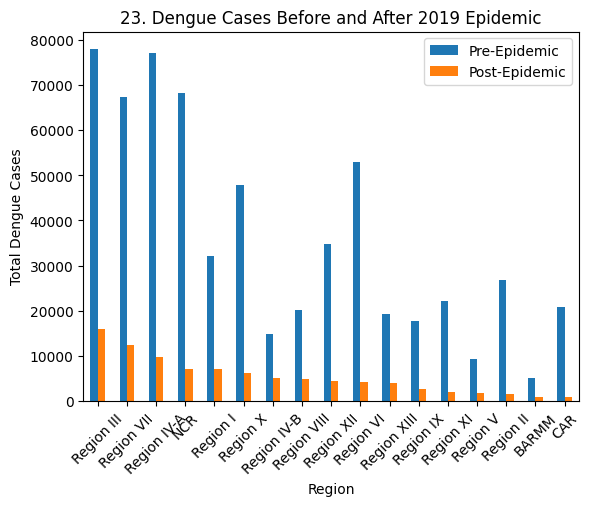

In [32]:
dengue['Year'] = dengue['Year'].astype(int)

pre_epidemic = dengue[dengue['Year'] < 2019].groupby('Region')['Dengue_Cases'].sum()
post_epidemic = dengue[dengue['Year'] > 2019].groupby('Region')['Dengue_Cases'].sum()

comparison = pd.DataFrame({'Pre-Epidemic': pre_epidemic, 'Post-Epidemic': post_epidemic})
comparison = comparison.sort_values(by='Post-Epidemic', ascending=False)

plt.figure(figsize=(20, 10))
comparison.plot(kind='bar')
plt.title("23. Dengue Cases Before and After 2019 Epidemic")
plt.xlabel("Region")
plt.ylabel("Total Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h1>Insight 24: Seasonal Dengue Death Trends by Region</h1>
<h3>The line plot reveals seasonal peaks in dengue-related deaths, often coinciding with peak transmission months. It helps allocate healthcare resources during high-risk periods.</h3>

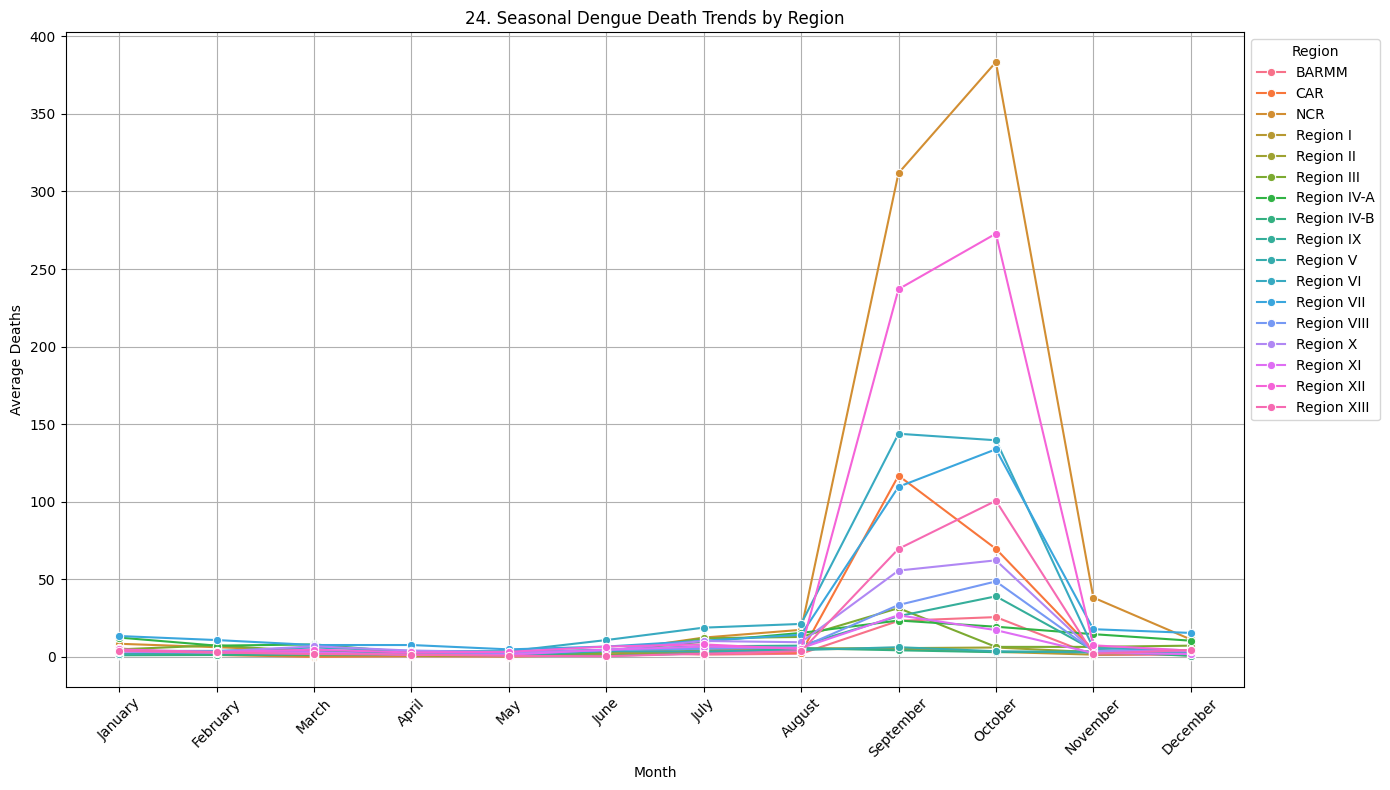

In [33]:
seasonal_deaths = dengue.groupby(['Month', 'Region'])['Dengue_Deaths'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=seasonal_deaths, x='Month', y='Dengue_Deaths', hue='Region', marker='o')
plt.title("24. Seasonal Dengue Death Trends by Region")
plt.xlabel("Month")
plt.ylabel("Average Deaths")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Region")
plt.tight_layout()
plt.show()

<h1>Insight 25: Cumulative Dengue Cases Over Years</h1>
<h3>This line chart shows the cumulative growth of dengue cases, emphasizing years with significant spikes (e.g., 2019). It provides a clear view of the overall burden of the disease over time.</h3>

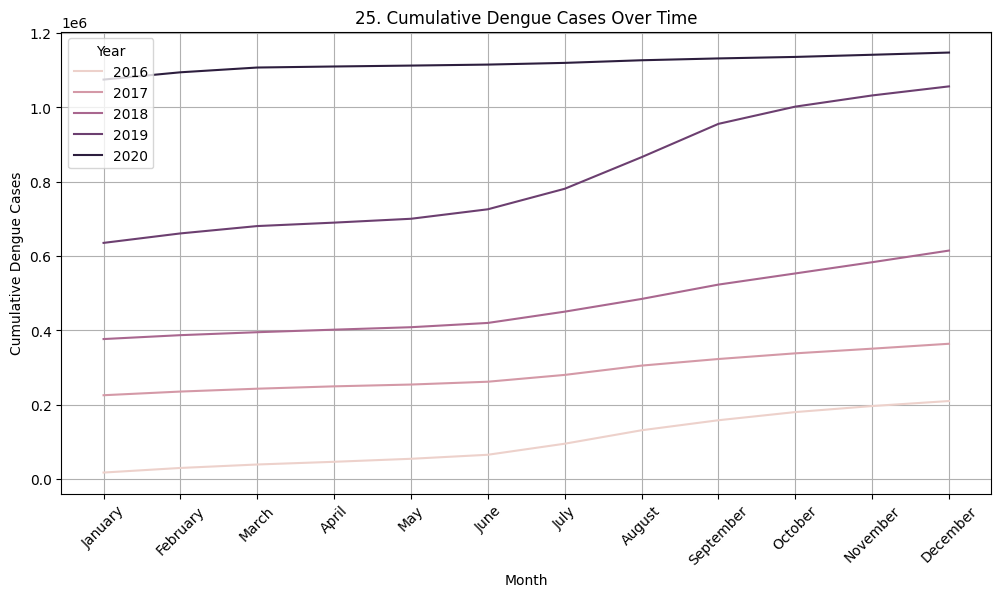

In [34]:
cumulative_cases = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_cases.reset_index(), x='Month', y='Dengue_Cases', hue='Year')
plt.title("25. Cumulative Dengue Cases Over Time")
plt.xlabel("Month")
plt.ylabel("Cumulative Dengue Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()